# Characteristic polynomial $P^{8V}_{\alpha,\beta}$ on the square lattice and its amoeba

In the case of the square lattice, a possible toric quadrangulation is the following.

<img src="z2_torus.svg" alt="drawing" width="500"/>

The numbers indicate the order of the vertices $V^T$ in our implementation. The horizontal and vertical cycles are $\gamma^{\mathcal{B}}_x$ and $\gamma^{\mathcal{B}}_y$.

We take arbitrary values of $\alpha$ and $\beta$. We decide that $\alpha[0]$ and $\beta[0]$ correspond to the face crossed by $\gamma^{\mathcal{B}}_x$, and $\alpha[1]$ and $\beta[1]$ to the other face.


In [71]:
alpha = [0.4,0.7]
beta = [1.3,0.9]

The correspond 8V weights $(A,B,C,D)$ and dimer weights $a=A/C, b=B/C, d=D/C$ can be computed. We write a function that returns the dimer weights, which is what we need to construct the Kasteleyn matrix.

In [72]:
def dim_weights(alpha,beta):
    A0 = sin(alpha[0]) + sin(beta[0])
    B0 = cos(alpha[0]) + cos(beta[0])
    C0 = 1 + sin(alpha[0]) * sin(beta[0]) + cos(alpha[0]) * cos(beta[0])
    D0 = cos(alpha[0]) * sin(beta[0]) - sin(alpha[0]) * cos(beta[0]) 

    a0=A0/C0
    b0=B0/C0
    d0=D0/C0

    A1 = sin(alpha[1]) + sin(beta[1])
    B1 = cos(alpha[1]) + cos(beta[1])
    C1 = 1 + sin(alpha[1]) * sin(beta[1]) + cos(alpha[1]) * cos(beta[1])
    D1 = cos(alpha[1]) * sin(beta[1]) - sin(alpha[1]) * cos(beta[1]) 

    a1=A1/C1
    b1=B1/C1
    d1=D1/C1
    
    return (a0,b0,d0,a1,b1,d1)

We can now define the Kasteleyn matrix $K_{\alpha,\beta}$ and the characteristic polynomial $P^{8V}_{\alpha,\beta}$. In our case the angles $\phi_e$ are all equal to $\pi / 4$.

To make the implementation easier, we want to keep polynomial expressions of $z,w$ and not Laurent polynomials. To do so we multiply the coefficients in the rows of $4$ and $5$ by $z$ (since some of them should contain a $z^{-1}$) and those of the rows $6$ and $7$ by $w$. This has the effect of multiplying the characteristic polynomial by $z^2w^2$, and does not change the amoeba.

In [73]:
pi = 4. * atan(1.)
R.<z,w> = CDF['z','w'] #the CDF (Complex Double Field) allows for faster computations.

def char_poly_z2(alpha,beta,x):
    a0,b0,d0,a1,b1,d1 = dim_weights(alpha,beta)
    K = matrix(R,
        [[0,I*a0,0,0,I*d0*z*x[0],b0*z,0,-e^(I*pi/4)],
         [I*a0,0,e^(-I*pi/4),0,-b0*z,I*d0*z/x[0],0,0],
         [0,-e^(I*pi/4),0,I*a1,0,0,I*d1*w*x[1],b1*w],
         [0,0,I*a1,0,e^(-I*pi/4),0,-b1*w,I*d1*w/x[1]],
         [I*d0*x[0],b0,0,-e^(I*pi/4)*z,0,I*a0*z,0,0],
         [-b0,I*d0/x[0],0,0,I*a0*z,0,e^(-I*pi/4)*z,0],
         [0,0,I*d1*x[1],b1,0,-e^(I*pi/4)*w,0,I*a1*w],
         [e^(-I*pi/4)*w,0,-b1,I*d1/x[1],0,0,I*a1*w,0]
        ])
    return (K.det())

In [74]:
P=char_poly_z2(alpha,beta,x)
P

0.15488870851*z^4*w^2 + (-4.22977787354)*z^3*w^3 + 0.222237808919*z^2*w^4 + 3.54986137957*z^3*w^2 + 2.78593931362*z^2*w^3 + (-4.22977787353)*z^3*w + 29.2232556111*z^2*w^2 + (-4.22977787353)*z*w^3 + 2.78593931362*z^2*w + 3.54986137957*z*w^2 + 0.222237808919*z^2 + (-4.22977787354)*z*w + 0.15488870851*w^2

We can then plot the amoeba. Most of the code is taken from Milo Bogaard's [Introduction to amoebas and tropical geometry](https://esc.fnwi.uva.nl/thesis/centraal/files/f28012519.pdf).

In [75]:
def amoeba (f, grid_step=100, angle_step=50, xm=-5., xM=5., ym=-5., yM=5.):
    # Takes a polynomial f in z,w over CDF and draws its amoeba.
    # High values of grid_step and angle_step give a more full picture but make the computation longer.
    
    x_grid_step_size = (xM-xm)/grid_step
    List_x = []
    for j in range(1,grid_step):
        r=CDF(xm+j*x_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF((k/angle_step)*pi*I)
            w1 = e^r * e^theta
            g = f(z,w1)
            h = g.univariate_polynomial()
            S = h.roots(multiplicities=False)
            for p2 in S:
                logp2 = log(abs(p2))
                List_x.append((r,logp2))
                
    y_grid_step_size = (yM-ym)/grid_step
    List_y = []
    for j in range(1,grid_step):
        r=CDF(ym+j*y_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF((k/angle_step)*pi*I)
            z1 = e^r * e^theta
            g = f(z1,w)
            h=g.univariate_polynomial()
            S=h.roots(multiplicities=False)
            for p2 in S:
                logp2 = log(abs(p2))
                List_y.append((logp2,r))

    return ( list_plot(List_x, aspect_ratio=1, size=2, xmin=xm, xmax=xM, ymin=ym, ymax=yM) +
             list_plot(List_y, aspect_ratio=1, size=2, xmin=xm, xmax=xM, ymin=ym, ymax=yM) )

0.213512868085*z^4*w^2 + 0.612851397031*z^3*w^3 + 0.00724617313072*z^2*w^4 + (-2.70082185161)*z^3*w^2 + (-1.9190427683)*z^2*w^3 + 0.612851397031*z^3*w + 6.76866888641*z^2*w^2 + 0.612851397031*z*w^3 + (-1.9190427683)*z^2*w + (-2.70082185161)*z*w^2 + 0.00724617313066*z^2 + 0.612851397031*z*w + 0.213512868085*w^2

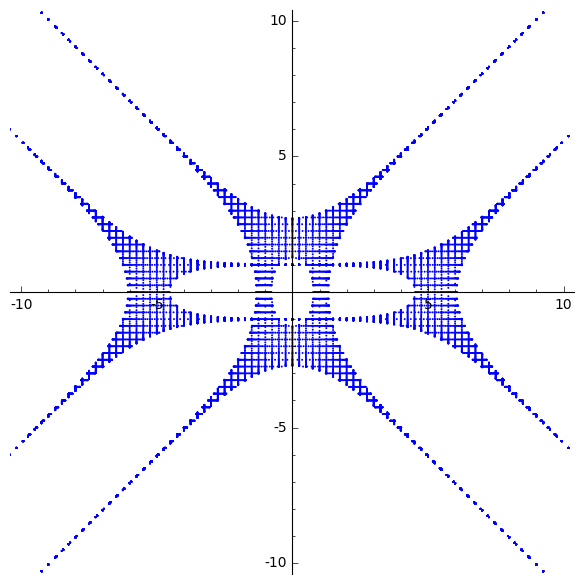

In [82]:
alpha = [0.01,0.7]
beta = [1.3,0.9]
P=char_poly_z2(alpha,beta,[1,1])
show(P)
l=10
amoeba(P,grid_step=80, angle_step=40,xm=-l,ym=-l,xM=l,yM=l) #this may take some time

Setting $\alpha=\beta$ produces the amoebae of the 6V model, which correspond to Harnack curves.

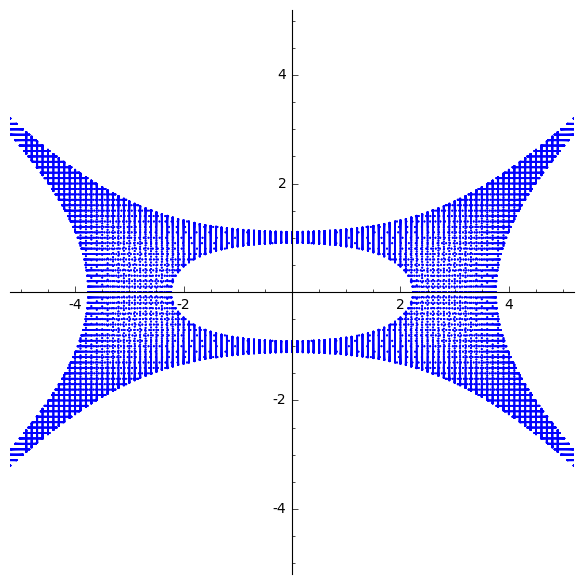

In [42]:
P_alpha = char_poly_z2(alpha,alpha,x)
amoeba(P_alpha,grid_step=100, angle_step=50)

In [43]:
P_beta = char_poly_z2(beta,beta,x)
#amoeba(P_beta,grid_step=250, angle_step=120)

In [44]:
Q1=P^2
Q2=P_alpha*P_beta
Q1 - (Q1.coefficients()[0] / Q2.coefficients()[0])*Q2

(-6.93889390391e-18)*z^8*w^4 + (-0.120579667478)*z^7*w^5 + (-0.267399091419)*z^6*w^6 + (-0.0410577638652)*z^5*w^7 + (4.04537514598e-14)*z^4*w^8 + 0.131804800999*z^7*w^4 + 1.88037593826*z^6*w^5 + 1.49225608729*z^5*w^6 + 0.0548626054064*z^4*w^7 + (-0.120579667477)*z^7*w^3 + (-2.02499136676)*z^6*w^4 + (-7.07271149712)*z^5*w^5 + (-1.9676794713)*z^4*w^6 + (-0.041057763865)*z^3*w^7 + 1.88037593825*z^6*w^3 + 6.53925096546*z^5*w^4 + 8.16510476858*z^4*w^5 + 1.49225608729*z^3*w^6 + (-0.267399091419)*z^6*w^2 + (-7.0727114971)*z^5*w^3 + (-4.81219607874)*z^4*w^4 + (-7.0727114971)*z^3*w^5 + (-0.267399091419)*z^2*w^6 + 1.49225608729*z^5*w^2 + 8.16510476858*z^4*w^3 + 6.53925096546*z^3*w^4 + 1.88037593825*z^2*w^5 + (-0.041057763865)*z^5*w + (-1.9676794713)*z^4*w^2 + (-7.07271149712)*z^3*w^3 + (-2.02499136676)*z^2*w^4 + (-0.120579667477)*z*w^5 + 0.0548626054064*z^4*w + 1.49225608729*z^3*w^2 + 1.88037593826*z^2*w^3 + 0.131804800999*z*w^4 + (4.04537514598e-14)*z^4 + (-0.0410577638652)*z^3*w + (-0.26739909